In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 25
import os
import subprocess

In [5]:
def movie_maker(folder_name,X,Y,T0,Tf,BOX_SIZE):
    fig, ax1 = plt.subplots(figsize=(5,5))
    for time in range(T0,Tf):
        ax1.clear()
        Xnow = X[time]
        Ynow = Y[time]
        # Xnext = X[time+1]
        # Ynext = Y[time+1]
        # Xp_now = Xp[time]
        # Yp_now = Yp[time]
        for posx, posy in zip(Xnow, Ynow):
            # lx= abs(-dx + posx)
            # ly = abs(-dy + posy)
            ax1.add_patch(plt.Circle((posx, posy), radius=0.15, fill=True,color='red'))
            # if lx >= BOX_SIZE/2 or ly >= BOX_SIZE/2:
            #     ax1.plot(posx,posy,lw=0,marker='o',ms=0.01)
            # else:
            #     ax1.plot(np.array([posx,dx]),np.array([posy,dy]))
            
            
            ax1.set_title(f'time {time}',fontsize=12,loc='left')
            
        ax1.set_xlim(0,BOX_SIZE)
        ax1.set_ylim(0,BOX_SIZE)
        # ax1.set_xticks([0,BOX_SIZE//2, BOX_SIZE])
        # ax1.set_yticks([0,BOX_SIZE//2, BOX_SIZE])
        ax1.set_xticks([0,BOX_SIZE])
        ax1.set_xticklabels([0,BOX_SIZE])
        ax1.set_yticks([])
        ax1.set_xlabel(r'$x$')
        ax1.set_ylabel(r'$y$')
        # ax1.set_aspect('equal', adjustable='box')
        plt.tight_layout()
        plt.savefig(f"{folder_name}/positions_{time:03d}.png",dpi=200,bbox_inches='tight')
    plt.show()
    return None

In [3]:
Dt=0.01
Nparticles=200
T=1000
box=10
cutoff=4
epsilon=1
kspring=4
lo=0.8
rate=20
sigma=0.15

folder_name=f"Dt_{Dt}_Nparticles_{Nparticles}_T_{T}_box_{box}_cutoff_{cutoff}_epsilon_{epsilon}_kspring_{kspring}_lo_{lo}_rate_{rate}_sigma_{sigma}"
positions_file = f"{folder_name}/particle_positions_{folder_name}.dat"
squared_disp_file = f"{folder_name}/squared_disp_{folder_name}.dat"

X,Y,Theta = np.loadtxt(positions_file, unpack=True)
Steps = len(X)//Nparticles
X = X.reshape((Steps, Nparticles))
Y = Y.reshape((Steps, Nparticles))
Theta = Theta.reshape((Steps,Nparticles))
folder_name

'Dt_0.01_Nparticles_200_T_1000_box_10_cutoff_4_epsilon_1_kspring_4_lo_0.8_rate_20_sigma_0.15'

Version without double force when attaching to other particles

In [12]:
Dt=0.01
Nparticles=200
T=3000
box=10
cutoff=4
epsilon=1
kspring=4
lo=0.8
rate=20
sigma=0.15

folder_name=f"Dt_{Dt}_Nparticles_{Nparticles}_T_{T}_box_{box}_cutoff_{cutoff}_epsilon_{epsilon}_kspring_{kspring}_lo_{lo}_rate_{rate}_sigma_{sigma}"
positions_file = f"wo_double_force/{folder_name}/particle_positions_{folder_name}.dat"
squared_disp_file = f"wo_double_force/{folder_name}/squared_disp_{folder_name}.dat"

X,Y,Theta = np.loadtxt(positions_file, unpack=True)
Steps = len(X)//Nparticles
X = X.reshape((Steps, Nparticles))
Y = Y.reshape((Steps, Nparticles))
Theta = Theta.reshape((Steps,Nparticles))
folder_name

'Dt_0.01_Nparticles_200_T_3000_box_10_cutoff_4_epsilon_1_kspring_4_lo_0.8_rate_20_sigma_0.15'

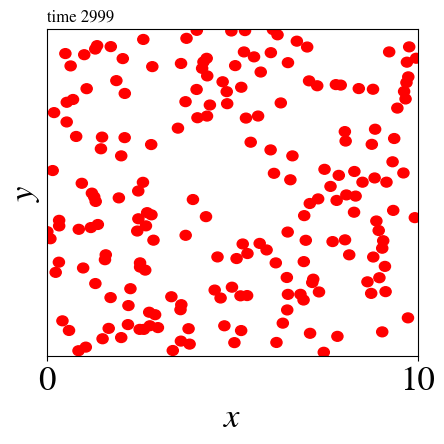

In [14]:

movie_maker('wo_double_force/'+folder_name,X,Y,2500,Steps,box)
# ffmpeg -r 25 -start_number 100 -i 'positions_%03d.png' -vf "crop=trunc(iw/2)*2:trunc(ih/2)*2"  -pix_fmt yuv420p movie.mp4

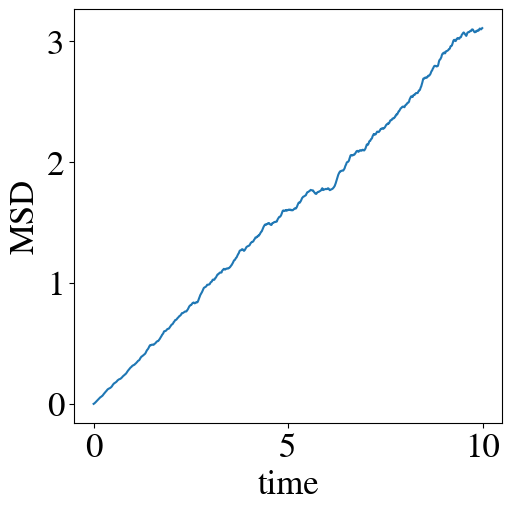

In [11]:
time, msd = np.loadtxt(squared_disp_file,unpack=True)
plt.figure(figsize=(5,5),layout = 'constrained')
plt.plot(time,msd)
plt.xlabel('time')
plt.ylabel('MSD')
plt.show()